In [2]:
import pandas as pd
import numpy as np
import re
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection
import seaborn as sns
import sklearn

I want to analyze whether we can predict a tennis match duration (whether it goes to 3 sets in a best of 3) using information about the match, similar to how a human hears the stats and can predict whether a match went a distance or not.

In [3]:
data = pd.read_csv("/Users/vpasupathy/Desktop/tennis_atp-master/atp_matches_2017.csv")
print(data.columns)
data.head()

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2017-M020,Brisbane,Hard,32,A,20170102,271,104678,NaN,NaN,...,53.0,33.0,13.0,11.0,6.0,10.0,29.0,1385.0,100.0,604.0
1,2017-M020,Brisbane,Hard,32,A,20170102,272,106378,NaN,NaN,...,67.0,39.0,27.0,12.0,9.0,10.0,45.0,1001.0,141.0,443.0
2,2017-M020,Brisbane,Hard,32,A,20170102,273,106298,6.0,NaN,...,42.0,29.0,16.0,12.0,0.0,4.0,15.0,2156.0,25.0,1585.0
3,2017-M020,Brisbane,Hard,32,A,20170102,275,111577,NaN,Q,...,37.0,27.0,7.0,10.0,2.0,5.0,105.0,570.0,34.0,1255.0
4,2017-M020,Brisbane,Hard,32,A,20170102,276,111442,NaN,WC,...,43.0,23.0,13.0,9.0,10.0,15.0,79.0,689.0,160.0,372.0


In [4]:
features_we_dont_want = ["winner_id", "loser_id", "tourney_date", "tourney_name", "tourney_id", "surface", "tourney_level", "winner_entry", "winner_name", "loser_name", "winner_hand", "winner_seed", "loser_seed", "loser_entry", "winner_ioc", "loser_hand", "round", "loser_ioc","draw_size", "match_num", "winner_ht", "loser_ht", "loser_age" ]

data.drop([col for col in data.columns if col  in features_we_dont_want], axis=1, inplace=True)

# print(data.head())

# for row_idx in range(0, len(data.values)):
#     if data.values[row_idx][7] != 3.0:
#         data.drop(index=row_idx, inplace=True)
#         row_idx = row_idx -1
        

for idx, row in enumerate(data.values):
    if row[2] != 3.0:
        data.drop(index=idx, inplace=True)

data.dropna(inplace=True)
# print(data.head())

y = []

for row in np.asarray(data):
    score = row[1]
    # print(score)
    if score.count(" ") == 2 and score.count("RET") == 0:
        y.append(1)
    else:
        y.append(0)

# print(y)

data.drop(columns=['score', 'best_of'], axis=1,inplace=True)

print(data.head())

   winner_age  minutes  w_ace  w_df  w_svpt  w_1stIn  w_1stWon  w_2ndWon  \
0        30.8     91.0   11.0   5.0    64.0     45.0      35.0       6.0   
1        21.9    130.0   11.0   2.0    83.0     48.0      37.0      19.0   
2        22.8    125.0    7.0   2.0   102.0     52.0      37.0      24.0   
3        20.2     75.0   12.0   2.0    55.0     33.0      27.0      13.0   
4        22.7     90.0    1.0   0.0    46.0     28.0      26.0       6.0   

   w_SvGms  w_bpSaved  ...  l_1stIn  l_1stWon  l_2ndWon  l_SvGms  l_bpSaved  \
0     11.0        1.0  ...     53.0      33.0      13.0     11.0        6.0   
1     12.0        2.0  ...     67.0      39.0      27.0     12.0        9.0   
2     12.0        8.0  ...     42.0      29.0      16.0     12.0        0.0   
3     10.0        0.0  ...     37.0      27.0       7.0     10.0        2.0   
4      8.0        1.0  ...     43.0      23.0      13.0      9.0       10.0   

   l_bpFaced  winner_rank  winner_rank_points  loser_rank  loser_ran

<Axes: >

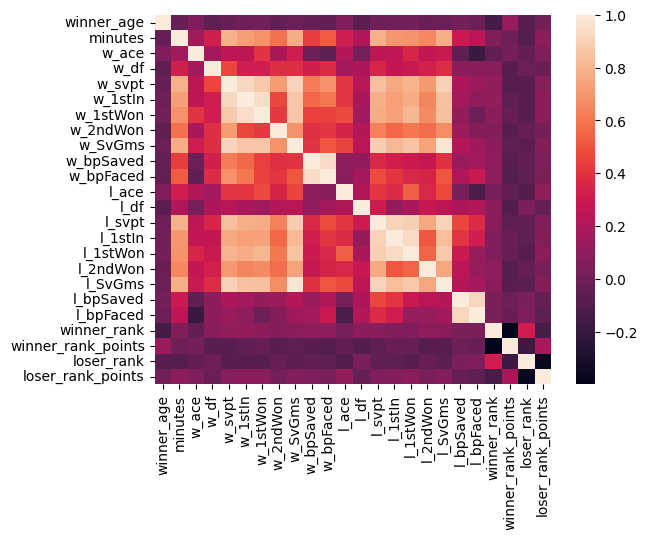

In [5]:
# print(data.corr())

sns.heatmap(data.corr())

In [6]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data, y, test_size=0.33, random_state=42)

In [7]:
clf = sklearn.svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

correct = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == y_test[i]:
        correct +=1

print(correct/len(y_pred))

0.6334269662921348


In [6]:
clf = sklearn.svm.SVC()

param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

grid = sklearn.model_selection.GridSearchCV(clf,param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(sklearn.metrics.classification_report(y_test,y_pred))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

        


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 1.6min
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 1.4min
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 3.6min
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 2.2min
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 3.2min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 1.6min
[CV] END ......................C=1, gamma=0.1, 

Summary:

Over the course of this project, I learned a lot about how this analysis worked. I experimented with multiple models, and came to the conclusion that the SVM was the best one in the way that it could properly split the data using a hyper plane with all these different parameters. I originally tried using a linear regression model with less results. I think its cool how this analysis led us to see some pretty cool predictions that a machine can learn the duration of the match to a very high accuracy by just getting a few details.

When I originally tried to analyze the data, I found it very helpful to plot correlation matrix to understand what the variables were and what power they had in the result. I think my confusion matrix shows that we got some pretty good results. 

I hope to expand this by trying this on future matches and also to analyze this further by trying to take away some of the variables and make it a ranking based system. 

Thanks!